In [19]:
import pandas as pd
data = pd.read_csv("ks-projects-201801.csv")  # or pd.read_excel, pd.read_json, etc.
# print(data.head())       # View the first few rows
print(data.info())       # Get an overview of data types and missing values
print(data.describe())   # Summary statistics for numerical columns
data.duplicated().sum()  # Count duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374864 entries, 0 to 374863
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374864 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 42.9+ MB
None
     

np.int64(0)

In [21]:


print(data.isnull().sum()) 
data['name'] = data['name'].fillna('Unknown')
data = data.dropna(subset=['usd pledged'])
columns_to_drop = ['goal', 'usd_pledged']
data.drop(columns=columns_to_drop, errors='ignore')
data.to_csv("ks-projects-201801.csv", index=False)

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


In [23]:
data['launched'] = pd.to_datetime(data['launched'], errors='coerce')
data['deadline'] = pd.to_datetime(data['deadline'], errors='coerce')

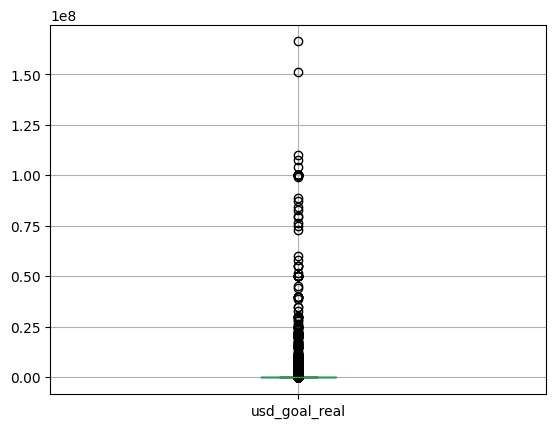

In [22]:
import matplotlib.pyplot as plt
data.boxplot(column='usd_goal_real')
plt.show()




In [30]:
min_threshold = 0
max_threshold = data['usd_goal_real'].quantile(0.95)  # 95th percentile as the upper limit

# Filter the data
filtered_data = data[(data['usd_goal_real'] > min_threshold) & (data['usd_goal_real'] < max_threshold)]
data.to_csv("ks-projects-201801.csv", index=False)

print(data.head())       # View the first few rows

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal  \
0          Poetry    Publishing      GBP 2015-09-10   1000.0   
1  Narrative Film  Film & Video      USD 2017-01-11  30000.0   
2  Narrative Film  Film & Video      USD        NaT  45000.0   
3           Music         Music      USD        NaT   5000.0   
4    Film & Video  Film & Video      USD        NaT  19500.0   

             launched  pledged     state  backers country  usd pledged  \
0 2015-11-08 12:12:00      0.0    failed        0      GB          0.0   
1 2017-02-09 04:43:00   2421.0    failed       15      US 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load the dataset
file_path = 'ks-projects-201801.csv'
data = pd.read_csv(file_path)

# Preprocess the dataset
# Convert the target variable 'state' to binary (1 for 'successful', 0 for others)
data['state_binary'] = (data['state'] == 'successful').astype(int)

# Select features and target
# Using 'goal', 'backers', and 'usd_goal_real' as example features
data['goal'] = pd.to_numeric(data['goal'], errors='coerce')
data['backers'] = pd.to_numeric(data['backers'], errors='coerce')
data['usd_goal_real'] = pd.to_numeric(data['usd_goal_real'], errors='coerce')
X = data[['goal', 'backers', 'usd_goal_real']].fillna(0)  # Fill missing values
y = data['state_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 0.8772758192949461

Confusion Matrix:
 [[46496  1652]
 [ 7549 19276]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     48148
           1       0.92      0.72      0.81     26825

    accuracy                           0.88     74973
   macro avg       0.89      0.84      0.86     74973
weighted avg       0.88      0.88      0.87     74973



In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'ks-projects-201801.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the dataset
# Convert the target variable 'state' to binary (1 for 'successful', 0 for others)
data['state_binary'] = (data['state'] == 'successful').astype(int)

# Encode 'country' using one-hot encoding
data = pd.get_dummies(data, columns=['country'], drop_first=True)

# Select features and target
# Using 'goal', 'backers', 'usd_goal_real', and one-hot encoded 'country' features
data['goal'] = pd.to_numeric(data['goal'], errors='coerce')
data['backers'] = pd.to_numeric(data['backers'], errors='coerce')
data['usd_goal_real'] = pd.to_numeric(data['usd_goal_real'], errors='coerce')
X = data[['goal', 'backers', 'usd_goal_real'] + list(data.filter(like='country_').columns)].fillna(0)
y = data['state_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Model Accuracy: 0.8789297480426287

Confusion Matrix:
 [[46495  1653]
 [ 7424 19401]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     48148
           1       0.92      0.72      0.81     26825

    accuracy                           0.88     74973
   macro avg       0.89      0.84      0.86     74973
weighted avg       0.88      0.88      0.88     74973



In [45]:
# Extract coefficients and feature names from the trained Logistic Regression model
coefficients = model.coef_[0]  # Coefficients for each feature
feature_names = X.columns  # Names of the features

# Create a DataFrame to pair feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate absolute values for coefficients (importance regardless of direction)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort by absolute value of the coefficients to find the most influential features
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

# Select the top 10 most important features
top_features = feature_importance.head(10)

# Display the top features
print("\nTop 10 Most Influential Features:")
print(top_features)



Top 10 Most Influential Features:
       Feature  Coefficient
14  country_IT    -0.436319
9   country_ES    -0.405924
23  country_US     0.359431
11  country_GB     0.355123
7   country_DE    -0.269810
17  country_MX    -0.233504
21  country_SE    -0.183426
6   country_CH     0.178137
3   country_AU    -0.145348
22  country_SG    -0.137926


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

logreg = LogisticRegression(max_iter=10000)

# Load the dataset
file_path = 'ks-projects-201801.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the dataset
# Handle missing values in 'deadline' and 'launched'
data = data.dropna(subset=['deadline', 'launched'])

# Convert 'state' to binary (1 for 'successful', 0 for others)
data['state_binary'] = (data['state'] == 'successful').astype(int)

# Create 'campaign_duration' as a new feature
data['deadline'] = pd.to_datetime(data['deadline'], errors='coerce')
data['launched'] = pd.to_datetime(data['launched'], errors='coerce')
data['campaign_duration'] = (data['deadline'] - data['launched']).dt.days

# Handle extreme outliers in 'usd_goal_real'
goal_cap = data['usd_goal_real'].quantile(0.99)
data['usd_goal_real'] = data['usd_goal_real'].clip(upper=goal_cap)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['category', 'main_category', 'currency', 'country'], drop_first=True)

# Prepare features and target
features = ['usd_goal_real', 'campaign_duration', 'backers'] + list(data.filter(like='category_').columns) + \
           list(data.filter(like='main_category_').columns) + list(data.filter(like='currency_').columns) + \
           list(data.filter(like='country_').columns)
X = data[features]
y = data['state_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Identify Most Influential Features
# Extract coefficients and feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficients (most influential first)
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')
# Filter only features with positive coefficients


positive_features = feature_importance[feature_importance['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_features = feature_importance[feature_importance['Coefficient'] < 0].sort_values(by='Coefficient', ascending=True)

# # Display top 10 for each
print("Top 10 Positive Influential Features:")
print(positive_features.head(10))

print("\nTop 10 Negative Influential Features:")
print(negative_features.head(10))

# # Display the top 10 most important features
top_features = feature_importance.head(10)
print("\nTop 10 Most Influential Features:")
print(top_features)


Logistic Regression Evaluation:
Accuracy: 0.8940986629783311
Precision: 0.915305795709254
Recall: 0.7637942551770207
F1-Score: 0.8327142961182725

Confusion Matrix:
 [[13676   529]
 [ 1768  5717]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     14205
           1       0.92      0.76      0.83      7485

    accuracy                           0.89     21690
   macro avg       0.90      0.86      0.88     21690
weighted avg       0.90      0.89      0.89     21690

Top 10 Positive Influential Features:
                      Feature  Coefficient
131           category_Shorts     0.588605
177       main_category_Dance     0.499033
163       main_category_Dance     0.499033
25   category_Classical Music     0.407692
74        category_Indie Rock     0.392145
32    category_Country & Folk     0.325077
38             category_Dance     0.320752
138   category_Tabletop Games     0.309134
188     main_category_Thea

C:\Users\mahme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


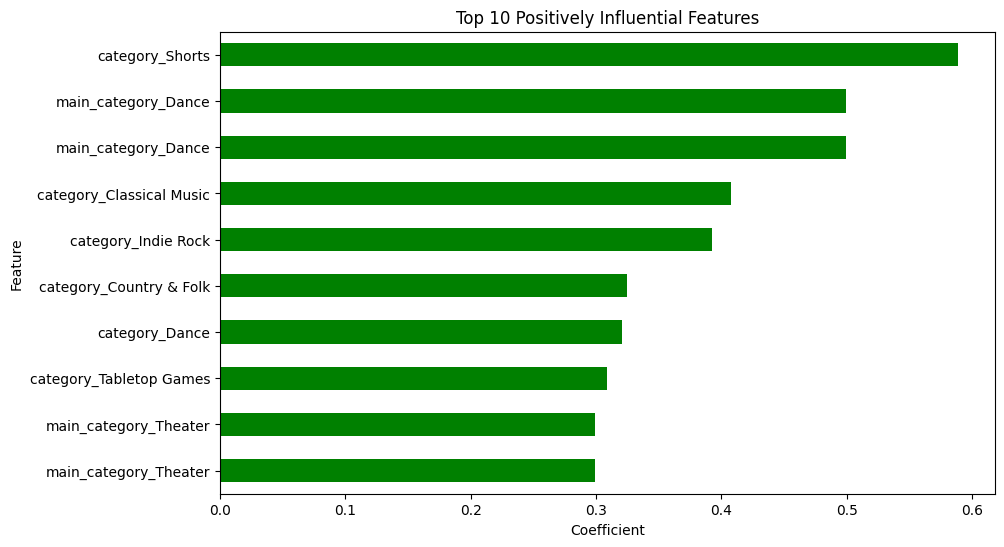

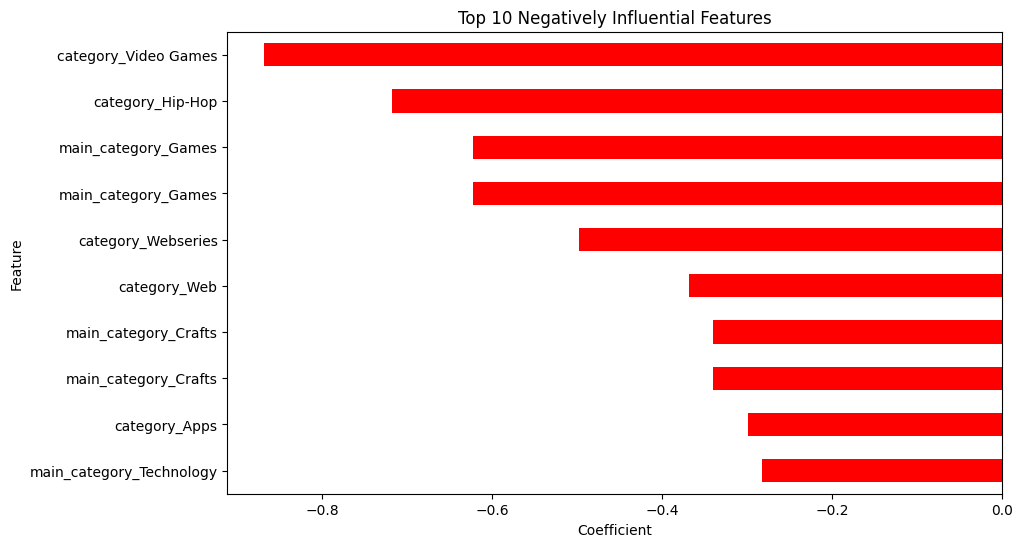

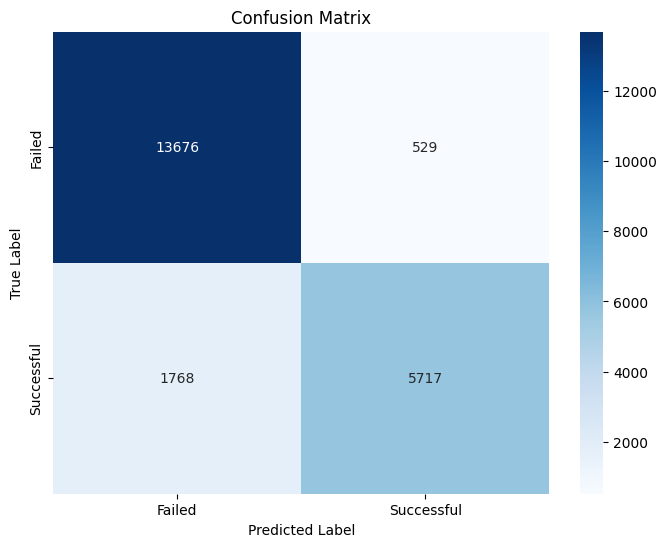

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Recalculate feature importance from the logistic regression model
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Separate positive and negative coefficients
positive_features = feature_importance[feature_importance['Coefficient'] > 0]
negative_features = feature_importance[feature_importance['Coefficient'] < 0]

# Sort by coefficient values
top_positive_features = positive_features.sort_values(by='Coefficient', ascending=False).head(10)
top_negative_features = negative_features.sort_values(by='Coefficient', ascending=True).head(10)

# Visualize Top 10 Positive Influential Features
top_positive_features.plot(kind='barh', x='Feature', y='Coefficient', legend=False, figsize=(10, 6), color='green')
plt.title('Top 10 Positively Influential Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Visualize Top 10 Negative Influential Features
top_negative_features.plot(kind='barh', x='Feature', y='Coefficient', legend=False, figsize=(10, 6), color='red')
plt.title('Top 10 Negatively Influential Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Failed', 'Successful'], yticklabels=['Failed', 'Successful'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


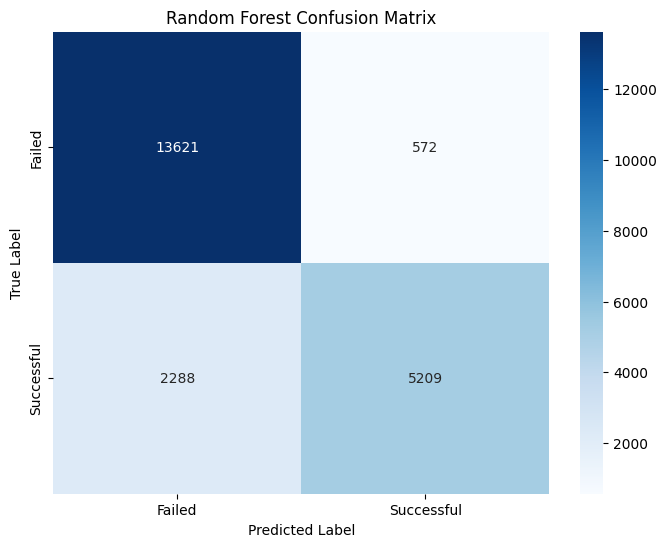

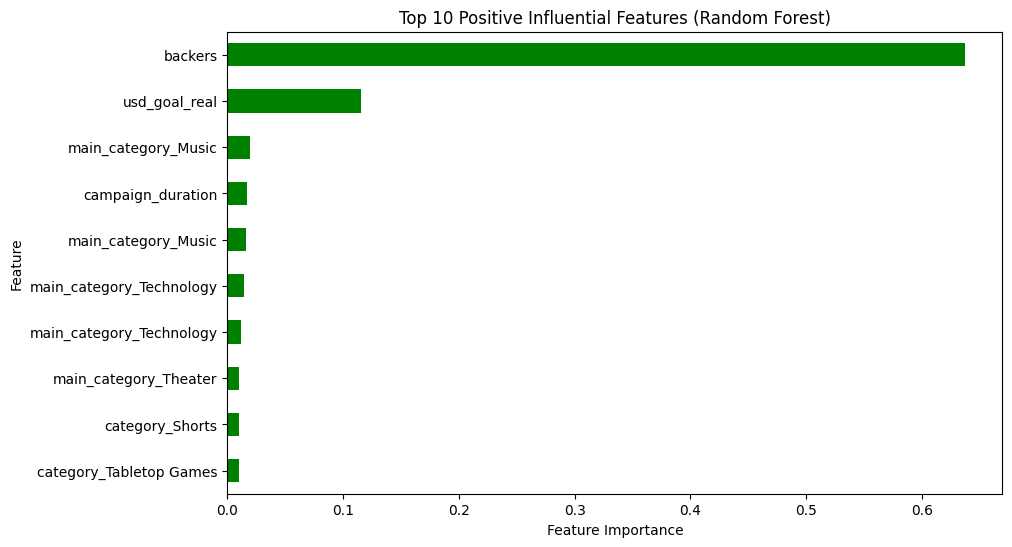

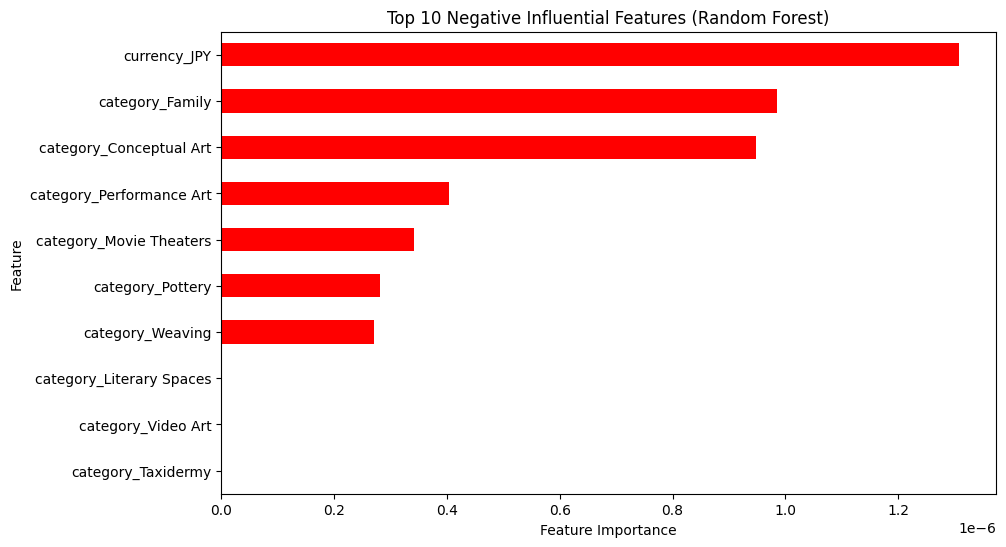

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Separate Positive and Negative Influences
median_importance = rf_feature_importance['Importance'].median()
positive_rf_features = rf_feature_importance.head(10)  # Top 10 features
negative_rf_features = rf_feature_importance.tail(10)  # Bottom 10 features

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Failed', 'Successful'], yticklabels=['Failed', 'Successful'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Top 10 Positive Features
positive_rf_features.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6), color='green')
plt.title('Top 10 Positive Influential Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Visualize Top 10 Negative Features
negative_rf_features.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6), color='red')
plt.title('Top 10 Negative Influential Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


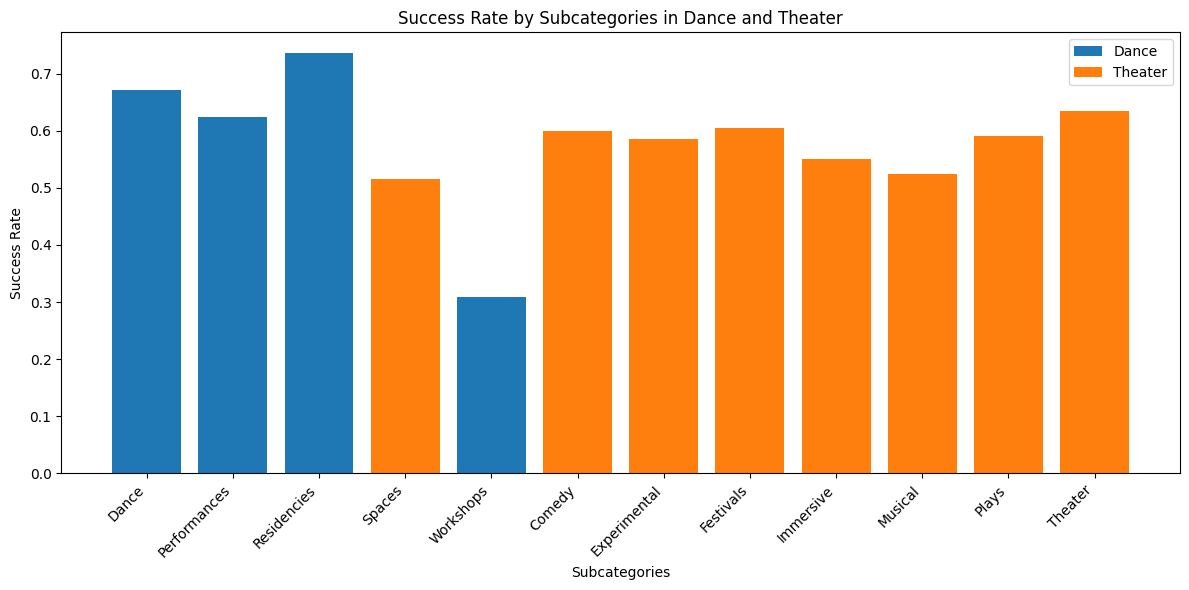

In [40]:
# Filter rows where 'main_category' is 'Dance' or 'Theater'
filtered_df = data[data['main_category'].isin(['Dance', 'Theater'])]

# Group by 'main_category' and 'subcategory', then calculate success rate
# Assume 'state' column has values 'successful' and 'failed'
success_rate = (
    filtered_data.groupby(['main_category', 'category'])['state']
    .apply(lambda x: (x == 'successful').sum() / len(x))
    .reset_index(name='success_rate')
)

# Plot success rates for Dance and Theater subcategories
plt.figure(figsize=(12, 6))
for category in ['Dance', 'Theater']:
    sub_data = success_rate[success_rate['main_category'] == category]
    plt.bar(sub_data['category'], sub_data['success_rate'], label=category)

plt.title("Success Rate by Subcategories in Dance and Theater")
plt.xlabel("Subcategories")
plt.ylabel("Success Rate")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()